<a href="https://colab.research.google.com/github/mehmetcan0/GlobalAI_Project_UrbanSOunds/blob/main/model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [4]:
X_train = np.load('/content/drive/MyDrive/X_train.npy')
y_train = np.load('/content/drive/MyDrive/y_train.npy')
X_val = np.load('/content/drive/MyDrive/X_val.npy')
y_val = np.load('/content/drive/MyDrive/y_val.npy')
X_test = np.load('/content/drive/MyDrive/X_test.npy')
y_test = np.load('/content/drive/MyDrive/y_test.npy')

In [5]:
model = tf.keras.Sequential()

In [6]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(64, 64, 1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [7]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
results = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=25,
                    validation_data=(X_val, y_val))

Epoch 1/25
110/110 [==============================] - 12s 19ms/step - loss: 1.7955 - accuracy: 0.3416 - val_loss: 1.2885 - val_accuracy: 0.5569
Epoch 2/25
110/110 [==============================] - 2s 18ms/step - loss: 1.2652 - accuracy: 0.5634 - val_loss: 0.9213 - val_accuracy: 0.7001
Epoch 3/25
110/110 [==============================] - 2s 17ms/step - loss: 0.9968 - accuracy: 0.6596 - val_loss: 0.8617 - val_accuracy: 0.7337
Epoch 4/25
110/110 [==============================] - 2s 17ms/step - loss: 0.8402 - accuracy: 0.7180 - val_loss: 0.6687 - val_accuracy: 0.7974
Epoch 5/25
110/110 [==============================] - 2s 15ms/step - loss: 0.7053 - accuracy: 0.7608 - val_loss: 0.5888 - val_accuracy: 0.8110
Epoch 6/25
110/110 [==============================] - 2s 17ms/step - loss: 0.6076 - accuracy: 0.8037 - val_loss: 0.5764 - val_accuracy: 0.8232
Epoch 7/25
110/110 [==============================] - 2s 15ms/step - loss: 0.5297 - accuracy: 0.8263 - val_loss: 0.4751 - val_accuracy: 0.843

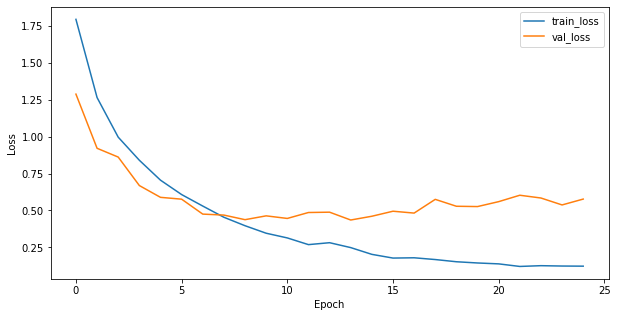

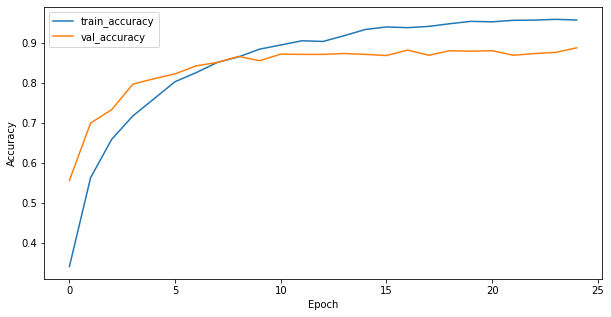

In [40]:
plt.figure(figsize=(10, 5))



plt.plot(results.history["loss"], label="train_loss")

plt.plot(results.history["val_loss"], label="val_loss")

plt.ylabel("Loss") 
plt.xlabel("Epoch")

plt.legend()
plt.show()




plt.figure(figsize=(10, 5))

plt.plot(results.history["accuracy"], label="train_accuracy")

plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.ylabel("Accuracy") 
plt.xlabel("Epoch")

plt.legend()
plt.show()

In [19]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 16ms/step - loss: 0.3311 - accuracy: 0.9086


[0.3311355710029602, 0.9085714221000671]